# Goals for AIGAME - RPS (Rock, Paper, Scissors) Part 5

### Learn some ways to view/analzye the data

### Start to learn about a particular Machine Learning algorithm : The Decision Tree




# Build Experience

### Diving into Machine Learning with Decision Trees
You have already learned about the Pandas DataFrame, the object we will use to store game history.
But now you must learn about some of the packages and objects which will do the learning. We will use algorithms and utilities from scikit-learn (https://scikit-learn.org/stable/index.html).

Scikit-learn provides implementations for many machine learning algorithms, but we will start with one: the Decision Tree (https://en.wikipedia.org/wiki/Decision_tree)

A Decision Tree arrives at a final answer (or result) by evaluating the results of a series of questions.

I think of Decision Trees like the old game of 20 questions. The objective it to determine the identify of an unknown object by posing 20 questions. For example, one  might start with:

*Is the object bigger than a loaf of bread?*

Based on the answer to this question, one would ask a new question. And based on that answer, one would ask a further question and so on. This is an example of a Decision Tree. The first question is the trunk of the tree and the answer to that first question sprouts new branches which themselves represent questions. 

*If the object is bigger than a loaf of bread, then ask 'Is it found normally outside the house?'*<br>
*Else if the object is not bigger than a loaf of bread, then ask 'Is it an animal?'*

Scikit-Learn provides a DecisionTree object which will create a Decision Tree based on our data. To do this, we need to provide the data associated with the questions (e.g. is it bigger than a breadbox? is it an animal?) as well as the answer itself (e.g. elephant, angel).

The DecisionTree algorithm then does the hard work of choosing a tree. Let's look at an example first.


### Iris Sample
Not only does sklearn provide packages for analyzing your own data (in this case Rock, Paper, Scissors games), it also provides some sample data that you can play with.

The Iris data set provides data associated with Iris flowers.

For each flower, there are 4 pieces of feature data:
1.  Sepal Length
1.  Sepal Width
1.  Petal Length
1.  Petal Width

With each set of feature data, we are also provided with the type of Iris flower. There are three types of Iris: Setosa, Versicolour and Virginica.

We want the Decision Tree to determine the type of Iris (Targer) from the Feature Data. 

In Machine Learning:<br>
**Target** - refers to the answer which the algorithm should determine.mIn this case, the target is the type of Iris<br>
**Features or Feature Data** - refers to all the data associated with the target. In this case it is the Sepal and Petal length and width


See also https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html

In [14]:
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
iris_data = load_iris()

#In python we can look at the properties of an object with the dir function
dir(iris_data)

['DESCR', 'data', 'feature_names', 'target', 'target_names']

In [15]:
iris_data.DESCR

'Iris Plants Database\n====================\n\nNotes\n-----\nData Set Characteristics:\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)\n    ============== ==== ==== ======= ===== ============

### Analyzing the Data
An important part of machine learning has a human component (thank God, right?). Normally it is up to us to choose algorithms appropriate to the problem but also to choose the feature data. In our case, there is not so much data so we can use it all, but real-world problems might have hundreds or more pieces of data and most of it might be useless to the problem at hand. 
Let's look at some ways to view the data

In [16]:
#Let's look at the target data
print('target types are', iris_data.target_names)
print('associated data is', iris_data.target)
#The 0 values in the array are for the setosa types, 1=versicolor, etc. Similar to how we did Rock, Paper, Scissors

target types are ['setosa' 'versicolor' 'virginica']
associated data is [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [17]:
#Let's look at the feature names
print('feature names are', iris_data.feature_names)
print('feature data is', iris_data.data)

feature names are ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
feature data is [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.1 1.5 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8

In [18]:
#Let's look in more detail at the data - it will be easier to view if we place it in a DataFrame
dsFeatures = pd.DataFrame(columns=iris_data.feature_names, data=iris_data.data)
dsFeatures.head()
#The head() method will show us the first 5 records of the data.

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [19]:
#Let's find out some statistical information about our features
dsFeatures.describe()
#The describe() method shows some statistical information on the data. 
#For example, we can see that there are 150 records. We can see that the average of the sepal length  is 5.843333

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [20]:
#Although the target (answer) and features will be separate in the end. It is often advantageous to combine them in a 
#DataFrame for analysis
dsTotal = dsFeatures
dsTotal['Target'] = iris_data.target
dsTotal.head()
#Since the Target is 0 and 0 corresponds to the 'Setosa' type, we know that these records correspond to Setosa flowers:

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [21]:
#Looking at the 'answer' we see that this data is evenly distributed as far as the type of Iris goes, 
# there are 50 of each kind

dsTotal['Target'].value_counts()

2    50
1    50
0    50
Name: Target, dtype: int64

In [22]:
#Let's look at average sepal length for the various targets. 
# We can see clear differences in the average sepal length for 
# the various types. Setosa flowers tend to have shorter sepal lengths than the other two types. 
pivot = dsTotal.pivot_table(index='Target', values='sepal length (cm)')
pivot #print the results

,sepal length (cm)
Target,
0,5.006
1,5.936
2,6.588


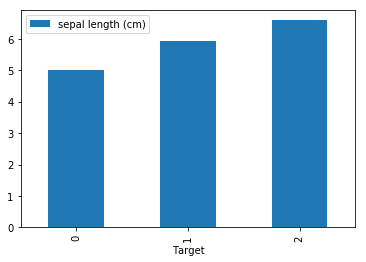

In [24]:
import matplotlib.pyplot as plt
pivot.plot.bar()
plt.show()

#### From the above data, we can make our own decision tree. For example:<br>
if sepal length < 5.5 then<br>
  Target is 0 (setosa)<br>
else if sepal length > 6 then<br>
  Target is 2 (virginica)<br>
else<br>
  Target is 1 (versicolor)

### We could spend alot more time playing with the data to investigate how to tell the difference between the various types of iris flowers. But let's move ahead with running the algorithm.


In [25]:

#Let's get straight into choosing an algorithm and applying it.
# It's really easy. Watch.
clf = DecisionTreeClassifier(random_state=0) # Create a Decision Tree Classifier (algorithm)
results = clf.fit(iris_data.data, iris_data.target) #run the algorithm passing the feature data and the target/answer
#That's It!! We are done. Results can now predict the type of an Iris based on the data.


The results object is a Decision Tree configured to our data. What could we do with it? Obviously we might want to use it to determine the Iris type of a new flower. Let's say we have a flower with sepal length=6, sepal width=3, petal length=3 and petal width=1.2. We can then have the Decision Tree give us its prediction as follows:

In [26]:

predicted_iris_type = results.predict([[6.0,3.0,4.0,1.2]])
print(predicted_iris_type)
#The prediction is that the above data corresponds to iris type 1 - versicolor

[1]


 That was pretty easy. Now we can get a predicition of the Iris type based on 4 measurements. But we should also ask ourselves:
 
 How good is this algorithm? 
 
 Fortunately, we also have methods to determine the accuracy of our Decision Tree


In [27]:
score = results.score(iris_data.data,iris_data.target)
print('The score is the fraction of the data in which the prediction is correct. In this case it is', score)

The score is the fraction of the data in which the prediction is correct. In this case it is 1.0


1 = 100%
## WHAT? 100%?? Can it really be that good?

Well, conider that we measured our score using the same data which we used to train/define the algorithm. This is a big no-no in the data science world. Rather we should split the data into two parts, one part we use to train the data and the other we use to determine the score.
In other words, if you learned to determine the type of Iris from the flowers in your garden, the real test of your abilities is whether you can go to your mom's garden and make accurate predictions.

Let's break the data into two parts:

In [29]:
#random_state=0 to force predictablity for us
#test_size=0.4 means we will take 40% of the data and place that in our test set
X_train, X_test, y_train, y_test = train_test_split(
    iris_data.data, iris_data.target, test_size=0.4, random_state=0)
print(X_train.shape) #90 rows of 4 numbers, data is an array of 4 element arrays
print(y_train.shape) #90 rows of 1 number


(90, 4)
(90,)


In [30]:
results = clf.fit(X_train, y_train)
results.score(X_test, y_test)


0.95

Now the accuracy (fraction of correct matches) is more believable, it is good but not perfect. This is an important concept of supervised machine learning: separation of the data used to learn from the data used to evaluate the effectivness of the algorithm.

### Confusion Matrix 
A confusion matrix gives us even more information. Beyond total accuracy we might want to know how many times did we mistake type 1 for type 2. See below

In [31]:
# See the predicted values
y_predict = results.predict(X_test)
#confusion matric tells us how about false positives and negatives per value
print(confusion_matrix(y_predict,y_test))
#Column 1 are the true values for value 1. We see that all 16 were classfified correctly
#Column 2 are the true values for value 2. We got 22 correct, but one was classified as value 3, so 22/23
#Column 3 are the true values for value 3, We got 19 correct with 2 wrong. So 19/21.
#Total is (16+22+19)/(16+23+21) = 0.95
print( (16+22+19)/(16+23+21.0))

[[16  0  0]
 [ 0 22  2]
 [ 0  1 19]]
0.95


# Execute - Let's apply what we learned to RPS
Notice that it is pretty straight forward

In [32]:
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [33]:
#Load our data
RPS_RESULTS_PATH = 'C:/Users/LEN320/Google Drive/DEV/Python/rps_results.xls'
def LoadGameResults(fileLoadPath):
    '''This function takes one argument (the path of the saved results) and returns a DataFrame'''
    retvalue = pd.read_excel(fileLoadPath, sheet_name="RPS Results")
    return retvalue

In [34]:
dsResults = LoadGameResults(RPS_RESULTS_PATH)
dsResults.head(100)
#len(dsResults.index)

,AI Response,Human Response,Outcome,Outcome Text
0,1,2,-1,Human Wins!
1,1,1,0,DRAW!
2,3,1,-1,Human Wins!
3,3,1,-1,Human Wins!!
4,3,1,-1,Human Wins!!
5,1,1,0,Draw!
6,2,2,0,Draw!
7,1,2,-1,Human Wins!!
8,3,3,0,Draw!
9,2,1,1,AI Wins!


In [35]:
#Split our results into feature and target
dsRPSTarget = dsResults['Outcome']
dsRPSFeatures = dsResults[['AI Response','Human Response']]
print(dsRPSTarget.head())
print(dsRPSFeatures.head())

0   -1
1    0
2   -1
3   -1
4   -1
Name: Outcome, dtype: int64
   AI Response  Human Response
0            1               2
1            1               1
2            3               1
3            3               1
4            3               1


In [39]:
#Split our data in training vs test
X_train, X_test, y_train, y_test = train_test_split(
    dsRPSFeatures, dsRPSTarget, test_size=0.5, random_state=0, shuffle=True)
print(X_train.shape) #90 rows of 4 numbers, data is an array of 4 element arrays
print(y_train.shape) #90 rows of 1 number

(6, 2)
(6,)


In [40]:
clf = DecisionTreeClassifier(random_state=0)
results = clf.fit(X_train,y_train)



### Note
We DID not ask our AI to play the game (we'll do that soon). Note that the 'Target' is the Outcome. So what we did is create a Decision Tree which will tell us the Outcome based on the AI and Human player's response. We are still getting use to it all, after all.

In [47]:
print(results.predict([[1,1]])) #Both Human and AI choose Paper
print(results.predict([[0,0]])) #Both Human and AI choose Rock
print(results.predict([[2,2]])) #Both Human and AI choose Scissors

[0]
[0]
[-1]


Your results might be different, but I received a 0 for the first two cases (correct as 0 = Draw) but a -1 for the last case which is not correct.

In [41]:
results.score(X_test,y_test)

0.42857142857142855

In [42]:
y_predict = results.predict(X_test)
print(confusion_matrix(y_predict,y_test))


[[2 3 1]
 [0 1 0]
 [0 0 0]]


### Wrapup
Our naive RPS Decision Tree achieved 47% effectiveness on our small test set. That doesn't sound good and it is not. You might get a better result if you had entered more data, I used only 12 games. Remember, this Decision Tree is predicting the outcome of the game and as long as our input data is correct, it should get that right.
Next, we will make a Decision Tree which decides how the AI should play.
